# Pulse Transmission between Software-Defined Radios (SDRs)

In this notebook, we will walk through setup and operation of SDRs to transmit pulse train data for pulsar signal simulation.

## Checking SDR Connectivity

To start, it is necessary to make sure you have successfully mounted the SDRs to your PC via USB. You can check this by executing the following commands in a command prompt:

```
# ping 192.168.2.1
# ping 192.168.2.2
```

For each of these commands, you should see four data packets successfully sent to the SDR and received back by the PC.

Next, it will be necessary to check that both SDRs can transmit and receive data <i>to themselves</i>. You can do so by executing the following code. Before running this code, make sure both SDRs are mounted to your PC and have been pinged successfully, and that each one has a BNC cable connecting its Rx port to its Tx port.

In [68]:
import numpy as np
import adi
import matplotlib.pyplot as plt
import sdr_io

sample_rate = 1e6 # Hz
center_freq = 915e6 # Hz

tx_data = np.load('test_vec.npy')
tx_length = 5000

plot_rx_pulse_train = True
plot_rx_samples = True
plot_fft = True
check_fid = True

sdr1 = "ip:192.168.2.1"
sdr2 = "ip:192.168.2.2"

sdr_io.sdr_tx_rx(sample_rate,center_freq,
                 sdr1,sdr1,
                 tx_data,tx_length,
                 False,False, False, False)

sdr_io.sdr_tx_rx(sample_rate,center_freq,
                 sdr2,sdr2,
                 tx_data,tx_length,
                 False,False, False, False)

Now that you have verified both SDRs can transmit and receive data to and from your PC, connect the Tx port of the "X-RAY EMITTER" SDR to the Rx port of the "X_RAY DETECTOR" SDR and execute the following code. This will transmit the same test pulse as above, but between the two SDRs instead of within each one.

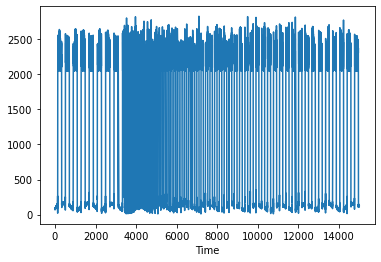

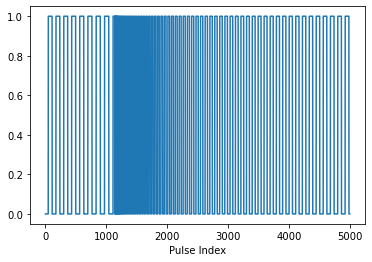

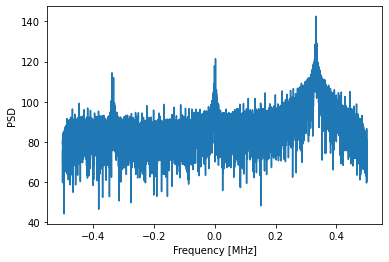

Out of phase by 1141
Success! Perfect Transmission!


In [70]:
sdr_io.sdr_tx_rx(sample_rate,center_freq,
                 sdr1,sdr2,
                 tx_data,tx_length,
                 plot_rx_pulse_train,plot_rx_samples,plot_fft,check_fid)

Once you have verified that the SDRs can communicate with one another, you are ready to proceed with data transmission.

## Transmitting Pulsar Simulation Data

After generating a pulse train from the OpenXNAV software, transmit it from the "Emitter" SDR to the "Detector" SDR by loading it through the code below.

Transmitted data


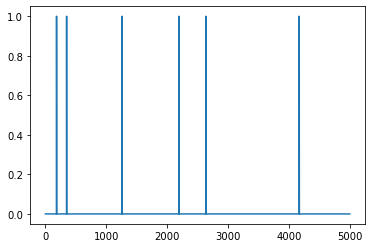

Received data


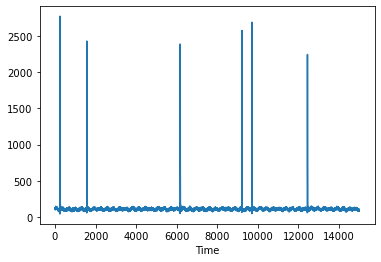

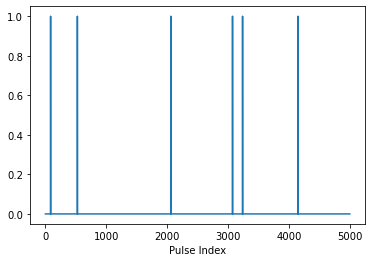

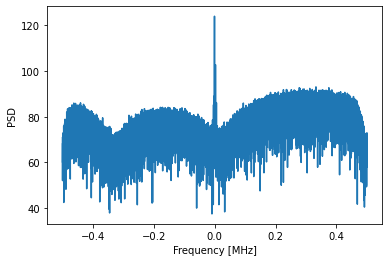

Out of phase by 2890
Success! Perfect Transmission!


In [71]:
tx_data_name = "pulsar_vec.npy" # insert filename for pulse train here
tx_data = np.load(tx_data_name)
tx_data = tx_data[:5000]
tx_length = len(tx_data)

plot_rx_samples = True # once connectivity and fidelic transmission is verified,
                        # this is redundant
plot_fft = True # no longer concerned with freq domain - only concerned 
                        # with transmitted pulses
check_fid = True # we have already verified connectivity - no need to check again
print("Transmitted data")
plt.plot(tx_data)
plt.show()
print("Received data")
sdr_io.sdr_tx_rx(sample_rate,center_freq,
                 sdr1,sdr2,
                 tx_data,tx_length,
                 plot_rx_pulse_train,plot_rx_samples,plot_fft,check_fid)